In [1]:
import numpy as np
from scipy import stats
from scipy import ndimage
import astropy
from astropy.table import Table
from astropy.nddata import CCDData
from astropy.nddata.utils import Cutout2D
from astropy import units as u
from astropy import wcs
import ccdproc
from ccdproc import trim_image
import PIL
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## To create a full training set, we need to read in the full MSI source catalogue, and then create cutouts around each coordinate

In [2]:
catalog = Table.read(r'C:\Users\clent\Documents\4th Year Project Code\overall_MSI_source_table.vot')
print(catalog.colnames)

['Frame_name', 'Cat_ID', 'lon', 'lat']


In [3]:
#creating zipped lists of coordinates to feed into cutout process
coords = list(zip(np.array(catalog['lon']), np.array(catalog['lat'])))

In [4]:
catalog_by_frame = catalog.group_by('Frame_name')
print(catalog_by_frame.groups[0])

  Frame_name    Cat_ID          lon                 lat         
------------- ---------- ------------------ --------------------
G002.5+0.0IFx   MeerACS1  1.315452074188857   0.3883327858272292
G002.5+0.0IFx   MeerACS2 1.3282130307094773  0.15171515388251258
G002.5+0.0IFx   MeerACS3  1.331387557662496  0.08540959557617867
G002.5+0.0IFx   MeerACS4 1.3918056434096595  0.07994350294988505
G002.5+0.0IFx   MeerACS5 1.4025373781955321   0.6842554048985261
G002.5+0.0IFx   MeerACS6  1.412827078039409 -0.29274504922448485
G002.5+0.0IFx   MeerACS7 1.4519364732167512  -0.7849233480296052
G002.5+0.0IFx   MeerACS8 1.4621132532105157  0.23339107396579956
G002.5+0.0IFx   MeerACS9 1.5001846531693346   0.5021795128875668
G002.5+0.0IFx  MeerACS10 1.5063662881393067  0.08719897427540121
          ...        ...                ...                  ...
G002.5+0.0IFx MeerACS223 3.9518177027391994 0.008039881349612053
G002.5+0.0IFx MeerACS225 3.9623662385416005  0.21664589488314287
G002.5+0.0IFx MeerACS228 

In [5]:
print(catalog_by_frame.groups.keys[32])
print(str(catalog_by_frame.groups.keys[57]))

  Frame_name 
-------------
G288.5-0.5IFx
 Frame_name
-----------
G357.5+000I


In [6]:
frame = CCDData.read(r'C:\Users\clent\Documents\4th Year Project Code\MeerKAT FITS\G288.5-0.5IFx_Mosaic_Mom0.fits', unit='Jy')

INFO: using the unit Jy passed to the FITS reader instead of the unit JY/BEAM in the FITS file. [astropy.nddata.ccddata]


In [7]:
longitudes = np.array(catalog_by_frame.groups[32]['lon'])
latitudes = np.array(catalog_by_frame.groups[32]['lat'])

coords = list(zip(longitudes, latitudes))

hdulist = frame.to_hdu()
w = wcs.WCS(hdulist[0].header)
matrix_coords = w.wcs_world2pix(coords, 1)

print(len(coords))

223


(-0.5, 63.5, -0.5, 63.5)

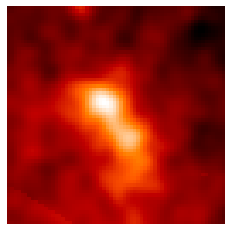

In [14]:
#test method

j=28
test_cutout = (Cutout2D(frame, matrix_coords[j], size=64))
test_norm_i = np.linalg.norm(test_cutout.data)
test_cutout.data = (test_cutout.data/test_norm_i) + 1
plt.imshow(test_cutout.data, cmap='gist_heat', origin='lower', norm=colors.LogNorm())
plt.axis('off')
# plt.savefig(r'C:\Users\clent\Documents\4th Year Project Code\Final Cutouts\G264.5-0.5IFx\\' + str(catalog_by_frame.groups[24]['Cat_ID'][j]) + '.png', format='png')

## Looping through a whole frame:

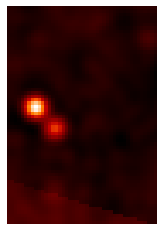

In [32]:
count = np.arange(len(matrix_coords))
for i in count:
    cutout = (Cutout2D(frame, matrix_coords[i], size=64))
    norm_i = np.linalg.norm(cutout.data)
    cutout.data = (cutout.data/norm_i) + 1
    plt.imshow(cutout.data, cmap='gist_heat', origin='lower', norm=colors.LogNorm())
    plt.axis('off')
    plt.savefig(r'C:\Users\clent\Documents\4th Year Project Code\Final Cutouts\G288.5-0.5IFx\\' + str(catalog_by_frame.groups[32]['Cat_ID'][i]) + '.png', format='png')